In [1]:
!pip install keras

  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached keras-3.10.0-py3-none-any.whl (1.4 MB)
Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 2.9/2.9 MB 20.8 MB/s eta 0:00:00
Using cached namex-0.1.0-py3-none-any.whl (5.9 kB)
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)

   ---- ----------------------------------- 1/9 [optree]
   ------------- -------------------------- 3/9 [mdurl]
   ----------------- ---------------------- 4/9 [h5py]
   ----------------- ---------------------- 4/9 [h5py]
   ----------------- -----------------

In [2]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 4.5/375.7 MB 33.6 MB/s eta 0:00:12
    --------------------------------------- 8.7/375.7 MB 24.5 MB/s eta 0:00:16
   - -------------------------------------- 12.8/375.7 MB 22.4 MB/s

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

In [4]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16944\2080350130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_count.values,


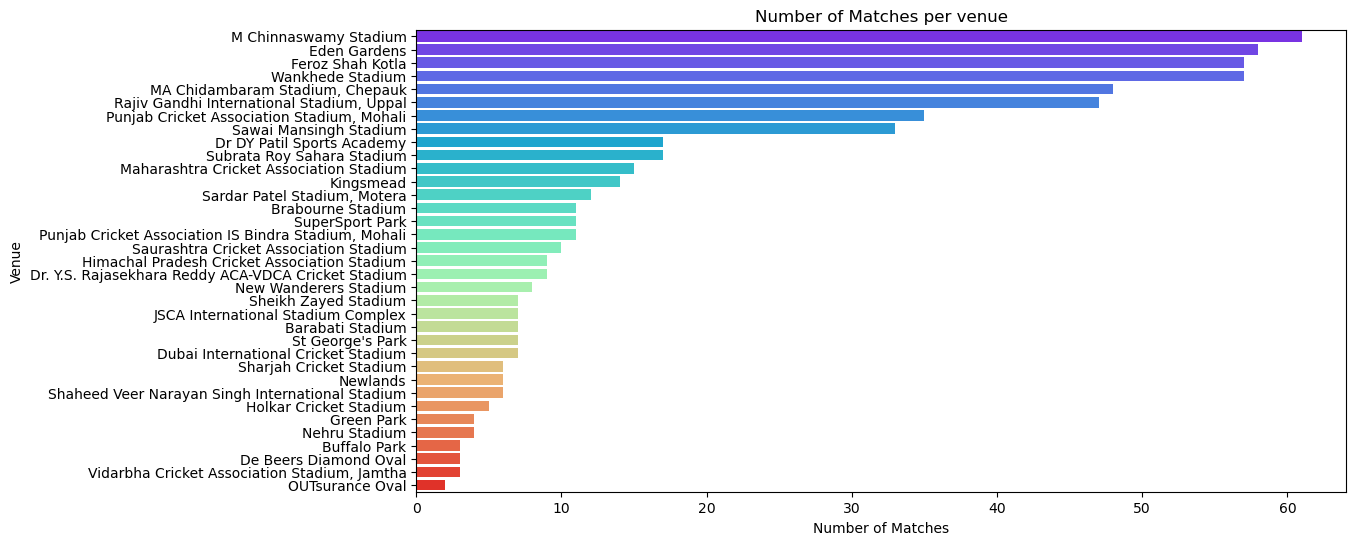

In [5]:
data = ipl.copy()
matches_per_venue = data[['mid','venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=matches_count.values,
y=matches_count.index,palette="rainbow")
plt.title('Number of Matches per venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16944\2509576146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_by_batsman.values, y=runs_by_batsman.index,palette="pastel")


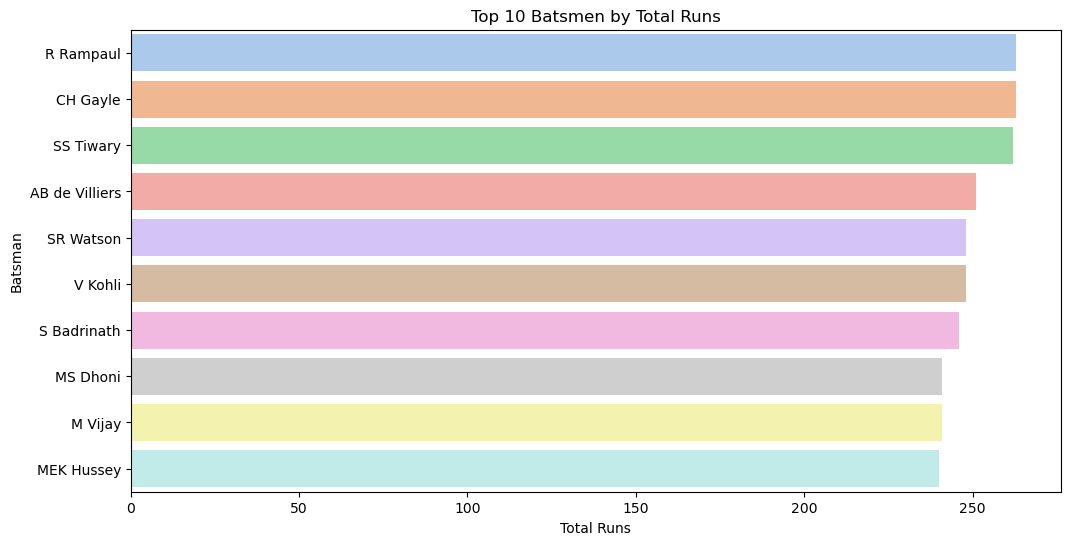

In [6]:
runs_by_batsman = data.groupby('batsman') ['runs'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=runs_by_batsman.values, y=runs_by_batsman.index,palette="pastel")
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16944\4076474738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="muted")


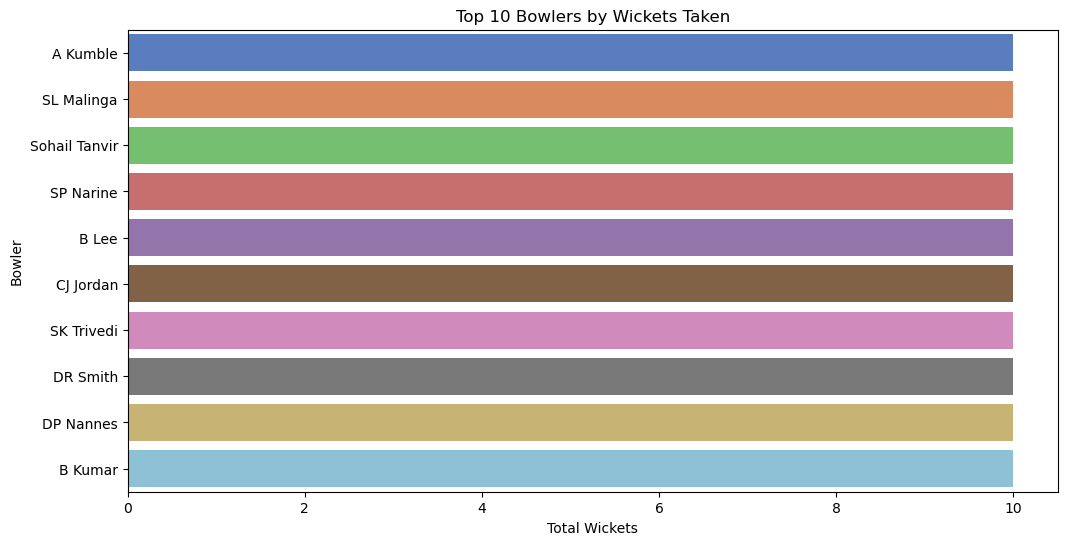

In [7]:
wickets_by_bowler = data.groupby('bowler') ['wickets'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="muted")
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['bat_team', 'bowl_team', 'venue', "batsman", "bowler"]

data_encoded = data.copy()

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    data_encoded[col]=le.fit_transform(data_encoded[col])
    label_encoders[col] = le

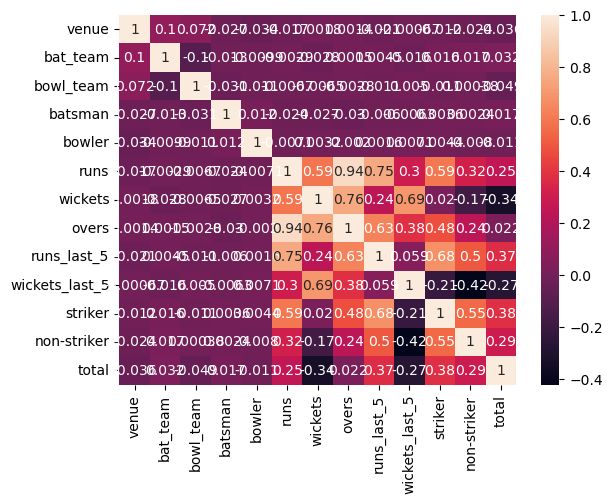

In [9]:
data_corr=data_encoded.drop(columns=["date","mid"],axis=1)
sns.heatmap(data_corr.corr(),annot=True)
plt.show()

In [10]:
feature_cols = ['bat_team', 'bowl_team', 'venue', 'runs', 'wickets', 'overs', 'striker', 'batsman', 'bowler']

x = data_encoded[feature_cols]
y = data_encoded['total']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42 )

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
model = keras.Sequential([
    keras.layers.Input(shape=(x_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])
huber_loss=tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)

In [13]:
model.fit(x_train_scaled, y_train, epochs=10, batch_size=64, validation_data=(x_test_scaled, y_test))

Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 50.8169 - val_loss: 14.7650
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 15.1210 - val_loss: 14.2991
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.7603 - val_loss: 14.3126
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.5487 - val_loss: 14.2800
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.6574 - val_loss: 14.0525
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.3369 - val_loss: 14.1610
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 14.3419 - val_loss: 13.8746
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.4027 - val_loss: 13.8310
Epoch 9/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.1791 - val_loss: 14.4344
Epoch 10/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.2894 - val_loss: 13.8394


<Axes: >

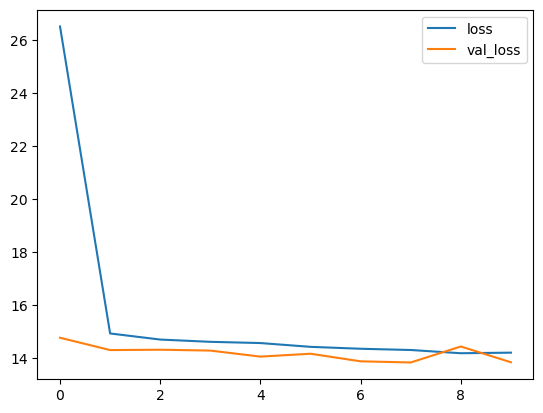

In [14]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [15]:
predictions = model.predict(x_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error 
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


14.33024787902832

In [16]:
!pip install ipywidgets


In [17]:
import ipywidgets as widgets
widgets.IntSlider()


IntSlider(value=0)

In [18]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

# Dropdowns with correct style keys
venue = widgets.Dropdown(
    options=list(label_encoders['venue'].classes_),
    description='Select Venue:'
)
venue.style = {'description_width': 'initial'}

batting_team = widgets.Dropdown(
    options=list(label_encoders['bat_team'].classes_),
    description='Select Batting Team:'
)
batting_team.style = {'description_width': 'initial'}

bowling_team = widgets.Dropdown(
    options=list(label_encoders['bowl_team'].classes_),
    description='Select Bowling Team:'
)
bowling_team.style = {'description_width': 'initial'}  # ✅ Fixed typo

striker = widgets.Dropdown(
    options=list(label_encoders['batsman'].classes_),
    description='Select Striker:'
)
striker.style = {'description_width': 'initial'}

bowler = widgets.Dropdown(
    options=list(label_encoders['bowler'].classes_),
    description='Select Bowler:'
)
bowler.style = {'description_width': 'initial'}

# Other input widgets
runs = widgets.IntText(value=0, description='Runs:', style={'description_width': 'initial'})
wickets = widgets.IntText(value=0, description='Wickets:', style={'description_width': 'initial'})
overs = widgets.FloatText(value=0.0, description='Overs:', style={'description_width': 'initial'})
striker_ind = widgets.IntText(value=0, description='Striker Index:', style={'description_width': 'initial'})

predict_button = widgets.Button(description="Predict Score")
output = widgets.Output()

# Prediction logic
def predict_score(b):
    with output:
        clear_output()

        encoded_venue = label_encoders['venue'].transform([venue.value])[0]
        encoded_batting_team = label_encoders['bat_team'].transform([batting_team.value])[0]
        encoded_bowling_team = label_encoders['bowl_team'].transform([bowling_team.value])[0]
        encoded_striker = label_encoders['batsman'].transform([striker.value])[0]
        encoded_bowler = label_encoders['bowler'].transform([bowler.value])[0]

        input_features = [
            encoded_batting_team, encoded_bowling_team, encoded_venue,
            runs.value, wickets.value, overs.value, striker_ind.value,
            encoded_striker, encoded_bowler
        ]

        input_array = np.array(input_features).reshape(1, -1)
        input_array = scaler.transform(input_array)
        predicted_score = model.predict(input_array)

        print(f"Predicted Total runs: {int(predicted_score[0])}")

predict_button.on_click(predict_score)

# Displaying all widgets
display(venue, batting_team, bowling_team, striker, bowler, runs, wickets, overs, striker_ind, predict_button, output)


Dropdown(description='Select Venue:', options=('Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park', 'De Be…

Dropdown(description='Select Batting Team:', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredev…

Dropdown(description='Select Bowling Team:', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredev…

Dropdown(description='Select Striker:', options=('A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary', 'A…

Dropdown(description='Select Bowler:', options=('A Ashish Reddy', 'A Chandila', 'A Choudhary', 'A Flintoff', '…

IntText(value=0, description='Runs:', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Wickets:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Overs:', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Striker Index:', style=DescriptionStyle(description_width='initial'))

Button(description='Predict Score', style=ButtonStyle())

Output()